# **NEURAL NETWORKS USING PYTORCH**

Resources:

- [datasets](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)
- [transforms](https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html)
- [neural network: sequential model](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)
- [Linear layer details](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [sentdex example](https://pythonprogramming.net/training-deep-learning-neural-network-pytorch/)
- [sentdex deep-learning playlist](https://www.youtube.com/watch?v=BzcBsTou0C0&list=PLQVvvaa0QuDdeMyHEYc0gxFpYwHY2Qfdh)

In [31]:
import torch

# dataset handling imports
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

# neural network imports
from torch import nn
import torch.nn.functional as F 
from torch import optim

# visualization import
import matplotlib.pyplot as plt

## Dataset - Fashion MNIST

In [61]:
train = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    # target_transform = Lambda(
    #     lambda y: torch.zeros(10, 
    #                           dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    
)

test = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    # target_transform = Lambda(
    #     lambda y: torch.zeros(10, 
    #                           dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
   
)

# target_transform: 
# each y is int
# gotta transform that to one-hot encoded labels
# reason: that is how pytorch trains over data
# Lambda generates zeros of shape (features,)
# and scatter places value=1 at the label index 0-9


In [62]:
labels = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

torch.Size([1, 28, 28]) torch.Size([28, 28])
torch.Size([1, 28, 28]) torch.Size([28, 28])
torch.Size([1, 28, 28]) torch.Size([28, 28])
torch.Size([1, 28, 28]) torch.Size([28, 28])
torch.Size([1, 28, 28]) torch.Size([28, 28])
torch.Size([1, 28, 28]) torch.Size([28, 28])
torch.Size([1, 28, 28]) torch.Size([28, 28])
torch.Size([1, 28, 28]) torch.Size([28, 28])
torch.Size([1, 28, 28]) torch.Size([28, 28])


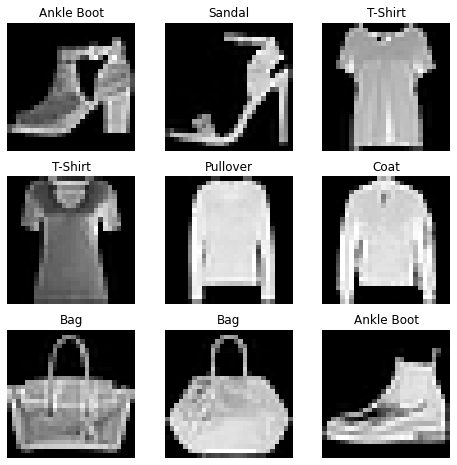

In [65]:
# visualization!

# figsize is in inches 
figure = plt.figure(figsize=(8,8))

# total 10 items
cols, rows = 3,3 

for i in range(1, cols*rows+1):
    index = torch.randint(len(train), size=(1,)).item()
    
    # train[index] = tuple(xX28x28_img, label)
    img, label = train[index]

    figure.add_subplot(rows,cols,i)

    # argmax returns index of 1 in one-hot encoded labels + item to get int
    # if using label -> one-hot encoding
    #plt.title(labels[torch.argmax(label).item()])
    plt.title(labels[label])
    plt.axis('off')
    # squeeze() : (1,28,28) -> (28,28)

    plt.imshow(img.squeeze(), cmap='gray')
    print(img.shape, img.squeeze().shape)

In [66]:
# preparing data


train_dataloader = DataLoader(
    train,
    batch_size = 64,
    shuffle = True
)

test_dataloader = DataLoader(
    test,
    batch_size = 64,
    shuffle = True
)

In [67]:
# extracts each batch with next()

train_features, train_labels = next(iter(train_dataloader))
test_features, test_labels = next(iter(test_dataloader))

In [68]:
print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])


## Neural Network


In [69]:
# Neural Network inherited class

class NeuralNetwork(nn.Module):

    def __init__(self):

        # super initializes base nn.Module class
        super(NeuralNetwork, self).__init__()

        # first input Layer
        # flattens 28*28 pixel values to 784 value 1D array

        self.flatten = nn.Flatten()


        # Linear(in_features, out_features,..)
        # in_features: inputs
        # out_features: no. of neurons basically which give 1 output each
        # ReLU : rectified linear unit activation fn 
        # ReLU = max(0, z)
        # SoftMax : 

        self.stack = nn.Sequential(
            nn.Linear(28*28, 128), # data-input layer
            nn.ReLU(), # data-input activation
            nn.Linear(128,128), # 128 neuron hidden-layer 1
            nn.ReLU(), # hidden-layer activation
            nn.Linear(128,128), # 128 neuron hidden-layer 2
            nn.ReLU(), # hidden-layer activation
            nn.Linear(128,10), # output layer
            nn.LogSoftmax() # log softmax: better for NLL Loss
        )


    # forward is called automatically
    def forward(self, X):
        X = self.flatten(X)

        # a logit is a function that represents probability between 0 and 1
        
        logits = self.stack(X)
        return logits


In [70]:
# model initialization

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
    (7): LogSoftmax(dim=None)
  )
)


In [74]:
# loss and optimizer
# LOSS fn: CrossEntropyLoss (alt: MSELoss)

## Note:
# since our labels our one-hot encoded: MSE is preferred
# if our labels were int: Cross Entropy is preferred

# OPTIMIZER: Adam (alt: SGD)

LEARNING_RATE = 1e-3
EPOCHS = 10

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


In [75]:
# TIME TO TRAIN!

for epoch in range(EPOCHS):

    for data in train_dataloader:
        # X: batch of features
        # y: batch of one-hot encoded labels
        # batch_size: 64
        X,y = data

        # set weights to zero per batch before loss calculations
        model.zero_grad()

        # returns softmax outputs after feed forward
        output = model(X)
        # loss calculation using:
        # NLL: negative log likelihood
        loss = F.nll_loss(output, y)

        # calculates gradients for backprop
        loss.backward()

        # simultaneous update of weights
        optimizer.step()

    print(loss)



/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor(0.1653, grad_fn=<NllLossBackward0>)
tensor(0.1820, grad_fn=<NllLossBackward0>)
tensor(0.0716, grad_fn=<NllLossBackward0>)
tensor(0.2869, grad_fn=<NllLossBackward0>)
tensor(0.2467, grad_fn=<NllLossBackward0>)
tensor(0.3090, grad_fn=<NllLossBackward0>)
tensor(0.2976, grad_fn=<NllLossBackward0>)
tensor(0.2008, grad_fn=<NllLossBackward0>)
tensor(0.2715, grad_fn=<NllLossBackward0>)
tensor(0.1055, grad_fn=<NllLossBackward0>)


In [77]:
# model evaluation


correct = 0
total = 0

with torch.no_grad():
    for data in test_dataloader:
        output = model(X)

        for index, i in enumerate(output):
            if torch.argmax(i) == y[index]:
                correct +=1
            total +=1

print(f"ACCURACY: {round(correct/total, 3)}")

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


ACCURACY: 0.969
